In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import math

import warnings
warnings.filterwarnings('ignore')

## Loading the data path

In [49]:
with open(r"E:\Learning\TEAI Cup\Data\Parquet Data\latest_data.json", 'r') as f:
    latest_data = json.load(f)
    d1_path = latest_data['d1']
    d2_path = latest_data['d2']
    d3_path = latest_data['d3']

## Loading the actual data using data paths

In [50]:
d1 = pd.read_parquet(d1_path)
d2 = pd.read_parquet(d2_path)
d3 = pd.read_parquet(d3_path)

# Lets try matching all 3 datas using Timestamp, Machine Id

In [86]:
sample = d1.sample()
machine_id = sample.machine_id.values[0]
start_time = pd.to_datetime(sample.machine_event_start_timestamp.values[0]) - pd.Timedelta(minutes=1)
actual_start = pd.to_datetime(sample.machine_event_start_timestamp.values[0])
end_time = pd.to_datetime(sample.machine_event_start_end_timestamp.values[0]) + pd.Timedelta(minutes=1)
actual_end = pd.to_datetime(sample.machine_event_start_end_timestamp.values[0])
part_number = sample.part_number.values[0]
tool_number = sample.tool_number.values[0]

print(f"Machine ID: {machine_id} \nStart Time: {start_time} \nEnd Time: {end_time} \nPart Number: {part_number} \nTool Number: {tool_number}")


Machine ID: S-226 
Start Time: 2025-12-08 12:19:55 
End Time: 2025-12-08 12:25:45 
Part Number: 5-965906-1 
Tool Number: S0025195


In [87]:
small_d2 = d2[(d2.timestamp >= start_time) & (d2.timestamp <= end_time) & (d2.machine_id == machine_id)]
small_d2

,machine_id,variable_name,value,timestamp,lowerLimit,upperLimit,nominalValue,min,max,average,range,outside_range_count,max_deviation
1044072,S-226,iTeil1Rastfeder,"43.3908,43.9993,39.4236,41.1357,41.774,42.0067...",2025-12-08 12:19:55,-25.000,25.000,50.00,38.2603,46.6600,42.941599,8.3997,100.0,11.7397
1044073,S-226,iTeil1Rastfederdifferenz,"0.0001,0.0098,0.0034,0.0042,0.0002,0.0079,0.00...",2025-12-08 12:19:55,-0.080,0.080,0.00,0.0001,0.0151,0.004749,0.0150,0.0,0.0151
1044074,S-226,prfungTeil1KastenSpk,"1.8789,1.8813,1.8849,1.8835,1.8845,1.8873,1.88...",2025-12-08 12:19:55,0.000,0.350,1.60,1.8726,1.8939,1.883595,0.0213,100.0,0.2939
1044075,S-226,teil2GapY,"0.4928,0.4934,0.4906,0.4909,0.494,0.4985,0.502...",2025-12-08 12:19:55,-0.060,0.000,0.53,0.4831,0.5108,0.496698,0.0277,100.0,0.0469
1044076,S-226,teil2GapX,"0.5021,0.5143,0.5066,0.4996,0.4999,0.4988,0.50...",2025-12-08 12:19:55,-0.060,0.000,0.53,0.4922,0.5143,0.501329,0.0221,100.0,0.0378
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047204,S-226,iTeil1Rastfeder,"39.9545,42.472,41.3684,44.4228,45.7233,43.3371...",2025-12-08 12:25:10,-25.000,25.000,50.00,35.5817,46.8210,42.981804,11.2393,100.0,14.4183
1047205,S-226,teil1GapY,"0.4983,0.4993,0.5025,0.508,0.503,0.5118,0.5014...",2025-12-08 12:25:10,-0.060,0.000,0.53,0.4915,0.5224,0.504822,0.0309,100.0,0.0385
1047206,S-226,folgefehlerTeil12,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",2025-12-08 12:25:10,0.000,10.000,0.00,0.0000,1.0000,0.060000,1.0000,0.0,1.0000
1047207,S-226,testMittelwertTeil2GapX,"0.4972,0.4972,0.4972,0.4972,0.4972,0.4972,0.49...",2025-12-08 12:25:10,-0.065,0.005,0.53,0.4972,0.4982,0.497684,0.0010,100.0,0.0328


In [88]:
# Lets check if there is errors in this and present in the final dataset d3
small_d3 = d3[(d3.timestamp >= actual_start) & (d3.timestamp <= actual_end) & (d3.machine_id == machine_id) & (d3.part_number == part_number)]
small_d3

,machine_id,machine_status_active_code,timestamp,part_number,error_variable,curr,ltl,utl
3518,S-226,200,2025-12-08 12:24:34,5-965906-1,iTeil2KastenVorne,1.903,1.75,1.9


# Analysis Based on
#### Min, Max, Mean, Std, range(max -min), % of values outside limit, count of outside values, max deviation from nominal

In [91]:
def add_defect_detection_columns(row:pd.Series ):
    value_list = np.array(list(map(float, row.value.split(","))))
    
    min_val = np.min(value_list)
    max_val = np.max(value_list)
    mean = np.mean(value_list)
    range_val = max_val - min_val
    std = np.std(value_list)
    
    upperLimit, lowerLimit, nominal = row.upperLimit, row.lowerLimit, row.nominalValue
    
    count_outside_values = np.sum((value_list > (upperLimit + nominal)) | (value_list < (nominal + lowerLimit)))
    max_deviation_from_nominal = np.max(np.abs(value_list - nominal))    
    
    return pd.Series({
        "min":min_val,
        "max":max_val,
        "avergae": mean,
        "std": std,
        "range": range_val,
        "outside_range_count": count_outside_values,
        "max_deviation": max_deviation_from_nominal 
    })

In [92]:
small_d2[["min", "max", "average","std", "range", "outside_range_count", "max_deviation"]] = (
    small_d2.apply(add_defect_detection_columns, axis=1)
)
small_d2


,machine_id,variable_name,value,timestamp,lowerLimit,upperLimit,nominalValue,min,max,average,range,outside_range_count,max_deviation,std
1044072,S-226,iTeil1Rastfeder,"43.3908,43.9993,39.4236,41.1357,41.774,42.0067...",2025-12-08 12:19:55,-25.000,25.000,50.00,38.2603,46.6600,42.941599,8.3997,0.0,11.7397,1.591591
1044073,S-226,iTeil1Rastfederdifferenz,"0.0001,0.0098,0.0034,0.0042,0.0002,0.0079,0.00...",2025-12-08 12:19:55,-0.080,0.080,0.00,0.0001,0.0151,0.004749,0.0150,0.0,0.0151,0.003225
1044074,S-226,prfungTeil1KastenSpk,"1.8789,1.8813,1.8849,1.8835,1.8845,1.8873,1.88...",2025-12-08 12:19:55,0.000,0.350,1.60,1.8726,1.8939,1.883595,0.0213,0.0,0.2939,0.003947
1044075,S-226,teil2GapY,"0.4928,0.4934,0.4906,0.4909,0.494,0.4985,0.502...",2025-12-08 12:19:55,-0.060,0.000,0.53,0.4831,0.5108,0.496698,0.0277,0.0,0.0469,0.005315
1044076,S-226,teil2GapX,"0.5021,0.5143,0.5066,0.4996,0.4999,0.4988,0.50...",2025-12-08 12:19:55,-0.060,0.000,0.53,0.4922,0.5143,0.501329,0.0221,0.0,0.0378,0.004534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047204,S-226,iTeil1Rastfeder,"39.9545,42.472,41.3684,44.4228,45.7233,43.3371...",2025-12-08 12:25:10,-25.000,25.000,50.00,35.5817,46.8210,42.981804,11.2393,0.0,14.4183,1.886325
1047205,S-226,teil1GapY,"0.4983,0.4993,0.5025,0.508,0.503,0.5118,0.5014...",2025-12-08 12:25:10,-0.060,0.000,0.53,0.4915,0.5224,0.504822,0.0309,0.0,0.0385,0.005985
1047206,S-226,folgefehlerTeil12,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",2025-12-08 12:25:10,0.000,10.000,0.00,0.0000,1.0000,0.060000,1.0000,0.0,1.0000,0.237487
1047207,S-226,testMittelwertTeil2GapX,"0.4972,0.4972,0.4972,0.4972,0.4972,0.4972,0.49...",2025-12-08 12:25:10,-0.065,0.005,0.53,0.4972,0.4982,0.497684,0.0010,0.0,0.0328,0.000266


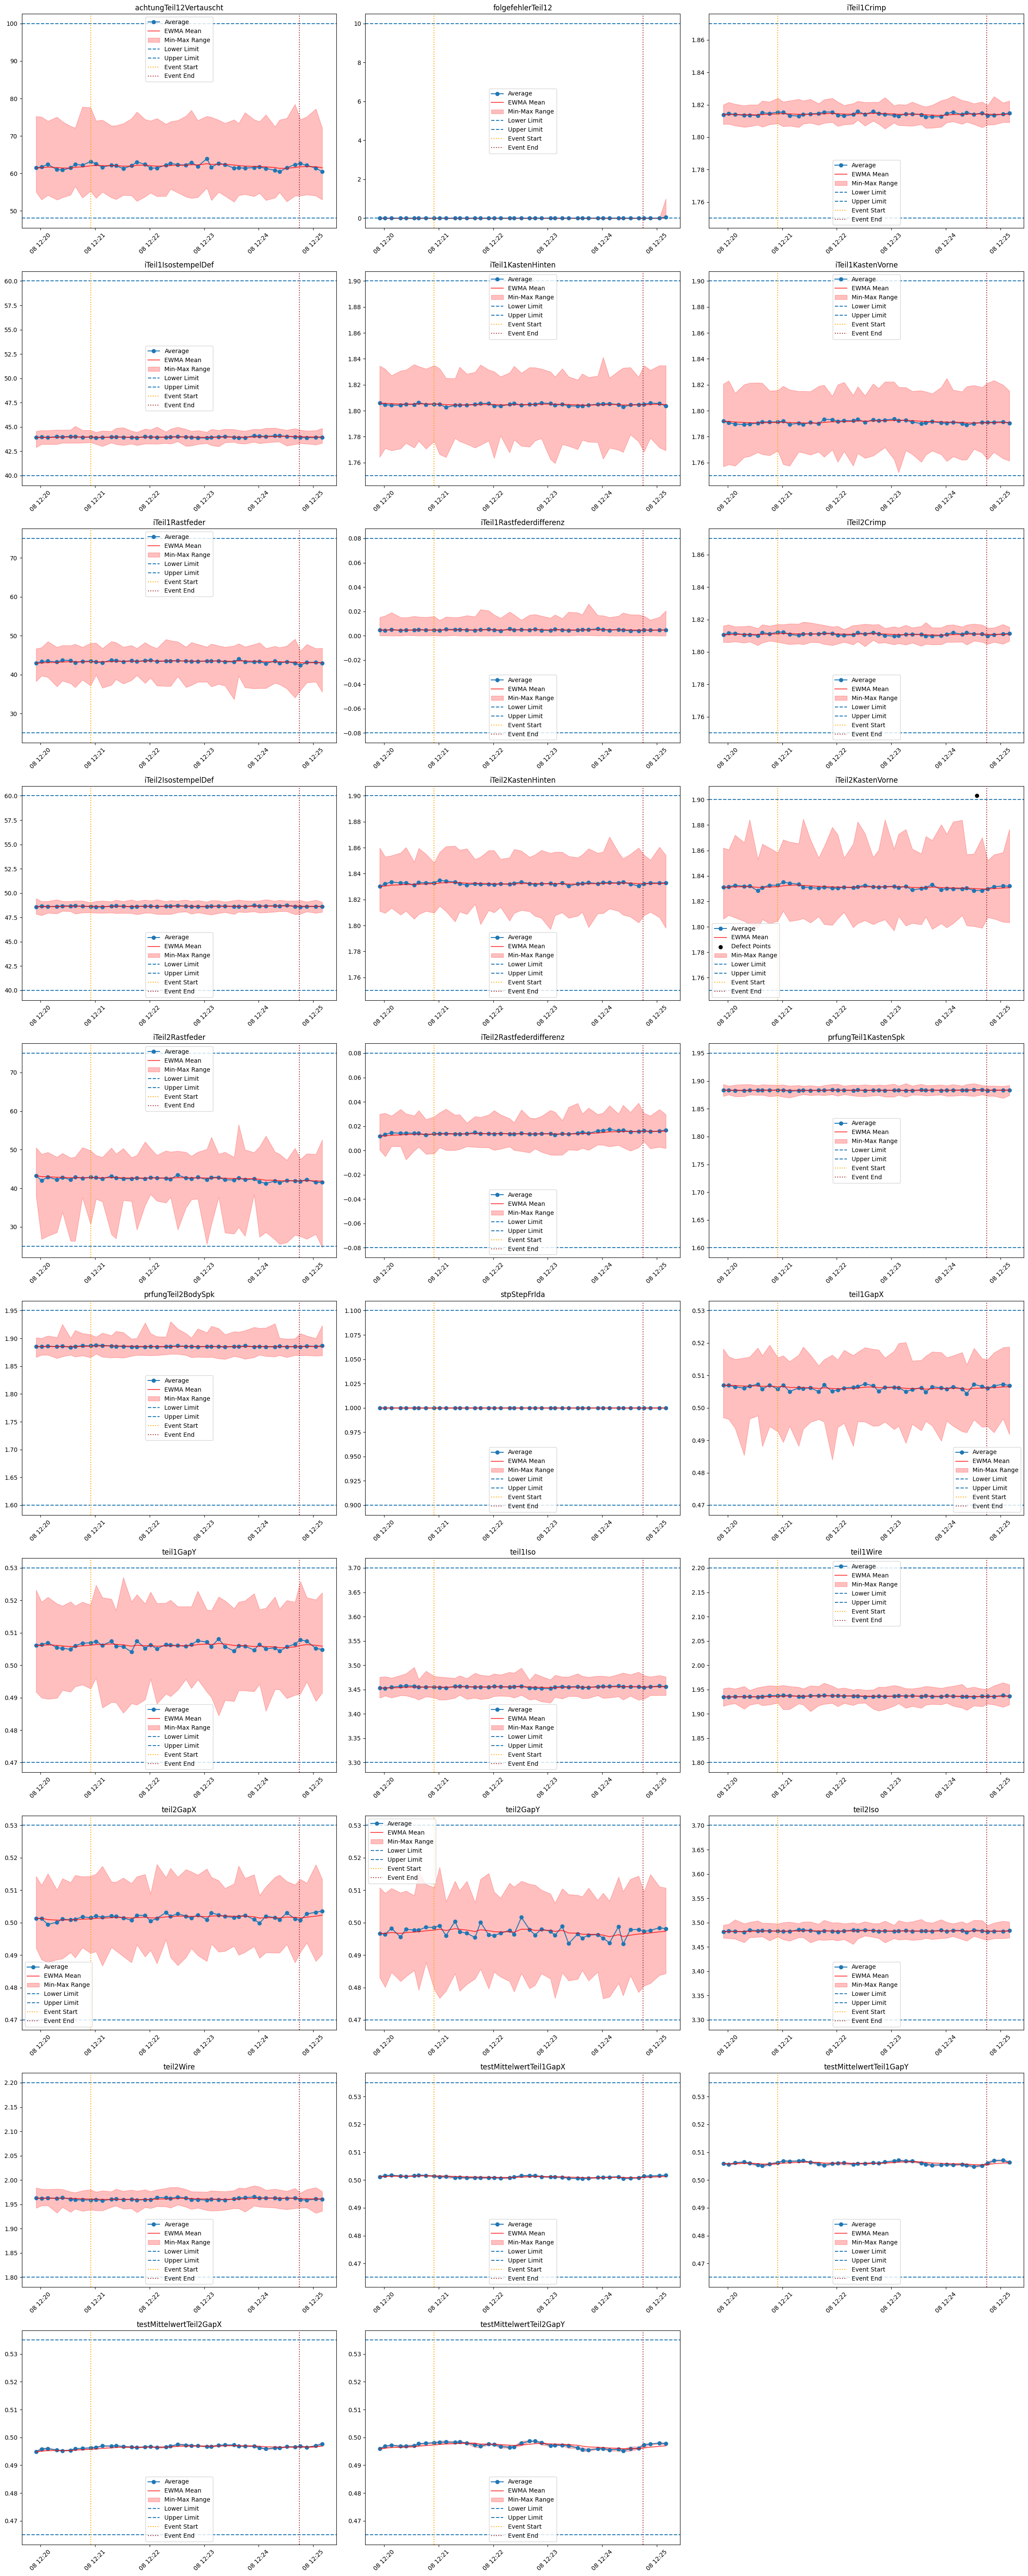

In [93]:
total_vars = sorted(small_d2.variable_name.unique().tolist())
cols = 3
rows = math.ceil(len(total_vars) / cols)

fig_width = 8 * cols  # width per column
fig_height = 6 * rows  # height per row

plt.figure(figsize=(fig_width, fig_height))

for i, var in enumerate(total_vars):
    temp = small_d2[small_d2.variable_name == var]
    temp['ewma_mean'] = temp['average'].ewm(alpha=0.2, adjust=False).mean()
    temp['ewma_std'] = temp['std'].ewm(alpha=0.2, adjust=False).mean()

    temp2 = small_d3[small_d3.error_variable == var]
    
    lowerLimit = temp.lowerLimit.values[0]
    upperLimit = temp.upperLimit.values[0]
    nominalValue = temp.nominalValue.values[0]
    
    time = temp.timestamp
    min_val = temp['min']
    max_val = temp['max']
    
    # Average value plotting
    plt.subplot(rows, cols, i+1)
    plt.plot(temp.timestamp, temp.average, marker = 'o', label='Average')
    plt.plot(temp.timestamp, temp.ewma_mean, label='EWMA Mean', color='red', alpha=0.7)
    
    # Defect points plotting
    if not temp2.empty:
        plt.scatter(temp2.timestamp, temp2.curr, color='black', label='Defect Points', zorder=5)
    
    
    # # Std Dev plotting
    # plt.plot(temp.timestamp, temp['std'], marker = 'o', label='Std Dev', color='green')
    # plt.plot(temp.timestamp, temp.ewma_std, label='EWMA Std', color='purple')
    
    # Min and max value area
    # plt.vlines(x=time, ymin=min_val,ymax=max_val,  linewidth=1)
    plt.fill_between(
        time,
        min_val,
        max_val,
        alpha=0.25,  # transparency
        color='red',
        label='Min-Max Range'
    )   

    # Upper and Lower Limits
    plt.axhline(lowerLimit + nominalValue, linestyle = "--", label="Lower Limit")
    plt.axhline(upperLimit + nominalValue, linestyle="--", label="Upper Limit")
    
    # Vertical lines for actual event duration
    plt.axvline(actual_start, color='orange', linestyle=':', label='Event Start')
    plt.axvline(actual_end, color='brown', linestyle=':', label='Event End')
    
    # Timestamp rotate to see it
    plt.xticks(rotation = 45)
    
    # Lables
    plt.title(f"{var}")
    plt.legend()
    # plt.ylim(nominalValue - 1.5*abs(lowerLimit), nominalValue + 1.5*abs(upperLimit))
    # others
plt.tight_layout()
plt.show()

